In [1]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.4 MB/s 


In [21]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
import yfinance as yf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


In [22]:
zeissData = yf.Ticker("AFX.DE")
data = zeissData.history(start="2005-01-01", end="2022-01-01")
data.reset_index(drop=False, inplace=True)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2005-01-03 00:00:00+01:00,7.916027,8.102287,7.916027,8.102287,7288,0.0,0
1,2005-01-04 00:00:00+01:00,8.090646,8.294367,8.090646,8.148852,51634,0.0,0
2,2005-01-05 00:00:00+01:00,8.090646,8.090646,7.939310,8.061543,6435,0.0,0
3,2005-01-06 00:00:00+01:00,8.119750,8.265265,8.119750,8.265265,72534,0.0,0
4,2005-01-07 00:00:00+01:00,8.265267,8.503912,8.265267,8.439885,106944,0.0,0
...,...,...,...,...,...,...,...,...
4315,2021-12-23 00:00:00+01:00,182.545889,184.931470,180.856113,182.148300,50865,0.0,0
4316,2021-12-27 00:00:00+01:00,181.949504,184.732674,179.315427,182.993195,32650,0.0,0
4317,2021-12-28 00:00:00+01:00,183.092575,185.478155,183.092575,183.589569,40871,0.0,0
4318,2021-12-29 00:00:00+01:00,183.639285,185.279359,182.545892,183.937485,28637,0.0,0


In [23]:
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
predicted = regressor.predict(X_test)

In [25]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [26]:
data1

,Actual,Predicted
0,24.846924,24.938854
1,25.681087,25.755066
2,13.726500,13.733547
3,97.845825,97.171054
4,20.259476,20.007649
...,...,...
1291,24.907846,24.910699
1292,13.409329,13.437883
1293,10.680820,10.615369
1294,43.081345,43.137749


In [27]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.2143070855494092
Mean Squared Error: 0.21597178107842113
Root Mean Squared Error: 0.4647276418273623


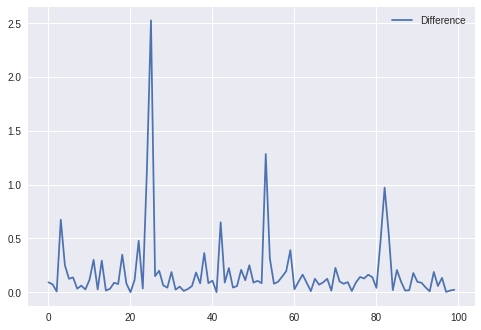

In [28]:
data_difference = pd.DataFrame({})

for x, y in data1.iterrows():
    difference = abs(y[0]-y[1])
    new_row = {'Difference':difference}
    data_difference = data_difference.append(new_row, ignore_index=True)

graph2 = data_difference.head(100)
graph2.plot(kind='line')